In [ ]:
# Install PyTorch with CUDA (for GPU support)
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu116

# Install Hugging Face Transformers, Tokenizers, and Datasets
!pip install transformers==4.26.1 sentencepiece==0.1.97 tokenizers==0.13.2 datasets==2.10.1

# Additional NLP & training utilities
!pip install accelerate==0.16.0 evaluate==0.4.0 rouge-score==0.1.2 nltk==3.8.1

# For Geez text processing (if needed)
!pip install ethiopic-numbers==0.1.2  # (Optional, for Amharic/Geez NLP)

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 0.9/2.0 GB 20.4 MB/s eta 0:00:54

In [ ]:
!pip install -U transformers peft accelerate
!pip install transformers
from transformers import (
    Seq2SeqTrainer, Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq, EarlyStoppingCallback,
    AutoModelForSeq2SeqLM, AutoTokenizer
)

print("✅ Success! All imports work.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-4.26.1:
      Successfully uninstalled transformers-4.26.1
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.16.0
    Uninstalling accelerate-0.16.0:
      Successfully uninstalled accelerate-0.16.0
✅ Success! All imports work.


In [ ]:
#!pip install protobuf==3.20.3 --quiet
!pip uninstall protobuf -y
!pip install protobuf==3.20.3 transformers accelerate peft datasets rouge-score -q


Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"


In [ ]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Kufale.json" "/content/Kufale.json"
!cp "/content/drive/MyDrive/ግዕዝ_ጥያቄ_ወአውስኦ.csv" "/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv"
!cp "/content/drive/MyDrive/geez_tigrigna.csv" "/content/geez_tigrigna.csv"

In [ ]:
drive.flush_and_unmount()

In [ ]:
import json
import pandas as pd
from pprint import pprint
# Load the translation dataset
with open('/content/Kufale.json', 'r', encoding='utf-8') as f:
    translation_data = json.load(f)
# Load the Q&A dataset
qa_data = pd.read_csv('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv', encoding='utf-8')
# Examine the datasets
print("Translation Data Sample:")
print(translation_data[:10])

print("\nQ&A Data Sample:")
print(qa_data.head(10))


# Load only the columns you need (ግዕዝ and ትግርኛ)
tig_df = pd.read_csv("/content/geez_tigrigna.csv", usecols=["ግዕዝ ", "ትግርኛ "])  # ← Note the spaces!
# Verify
print(tig_df.head(10))

Translation Data Sample:
[{'gez': 'ዝንቱ ነገረ ኩፋሌ መዋዕላተ ሕግ ወለስምዕ ለግብረ ዓመታት ለተሳብዖቶሙ ለኢዮቤልውሳቲሆሙ ውስተ ኵሉ ዓመታተ ዓለም በከመ ተናገሮ ለሙሴ በደብረ ሲና አመ ዐርገ ይንሣእ ጽላተ እብን ሕግ ወትእዛዝ በቃለ እግዚአብሔር በከመ ይቤሎ ይዕርግ ውስተ ርእሰ ደብር።', 'eng': 'These are the words regarding the divisions of the times of the law and of the testimony, of the events of the years, of the weeks of their jubilees throughout all the years of eternity as he related (them) to Moses on Mt. Sinai when he went up to receive the stone tablets — the law and the commandments — on the Lord’s orders as he had told him that he should come up to the summit of the mountain.'}, {'gez': 'ወኮነ በቀዳሚ ዓመት በፀአቶሙ ለደቂቀ እስራኤል እምነ ግብጽ በወርኅ ሣልስ አመ ዐሡሩ ወሰዱሱ ለውእቱ ወርኅ ተናገሮ እግዚአብሔር ለሙሴ እንዘ ይብል ዕርግ ኀቤየ ውስተ ደብር ወእሁበከ ክልኤ ጽላተ እብን ዘሕግ ወዘትእዛዝ ዘመጠነ ጸሐፍኩ ታለብዎሙ።', 'eng': 'During the first year of the Israelites’ exodus from Egypt, in the third month — on the sixteenth of the month — the Lord said to Moses: Come up to me on the mountain. I will give you the two stone tablets of the law 

In [ ]:
import re
import json
import pandas as pd

# ========== 1. Define your custom Geez stopwords ==========

custom_geez_stopwords = set("""
እስመ ውስተ አምጣነ አኮኑ እመ አመ በ ለ ከመ ጊዜ እንበለ ዘ እንተ እለ ለለ ከመከመ ሀበሀበ
በበ እንዘ ዘዘ ሀበ መንገለ ወእደ ህየንተ በይነ እንበይነ ፍዳ መጠነ ዐቅመ በቀለ አምሳለ
ጽላሎተ መዋዕለ አያተ እንዘእንዘ ወ
""".split())

# ========== 2. Define preprocessing function ==========

def preprocess_geez_text(text):
    if not isinstance(text, str):
        return ""

    # Remove Geez numerals (if needed) and punctuation
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Geez numerals
    text = re.sub(r'[።፣፤፥፦]', ' ', text)  # Remove Geez punctuation marks
    text = re.sub(r'[^\w\s]', '', text)  # Remove any other punctuation marks

    # Tokenize the text into words (using spaces as the delimiter)
    tokens = text.split()

    # Remove stopwords based on the custom list (ensure no extra spaces in the list)
    cleaned_tokens = [word for word in tokens if word.strip() not in custom_geez_stopwords]

    # Join the cleaned tokens back into a single string and return
    return ' '.join(cleaned_tokens)

def preprocess_english_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().strip()

# ========== 3. Load and process kufale.json ==========

with open('/content/Kufale.json', 'r', encoding='utf-8') as f:
    kufale_data = json.load(f)

# Apply the preprocessing functions to both the Geez and English text fields
for item in kufale_data:
    item['geez_processed'] = preprocess_geez_text(item['gez'])
    item['english_processed'] = preprocess_english_text(item['eng'])

# Convert the processed data into a DataFrame
kufale_df = pd.DataFrame(kufale_data)

# ========== 4. Load and process ግዕዝ_ጥያቄ_ወአውስኦ.csv ==========

qa_df = pd.read_csv('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv', encoding='utf-8')

# Apply the preprocessing function to the question and answer columns
qa_df['question_processed'] = qa_df['ጥያቄ'].apply(preprocess_geez_text)
qa_df['answer_processed'] = qa_df['አውስኦ'].apply(preprocess_geez_text)

# ========== 5. Optional: Show results ==========

print(kufale_df[['gez', 'geez_processed']].head())
print(qa_df[['ጥያቄ', 'question_processed']].head())


                                                 gez  \
0  ዝንቱ ነገረ ኩፋሌ መዋዕላተ ሕግ ወለስምዕ ለግብረ ዓመታት ለተሳብዖቶሙ ለ...   
1  ወኮነ በቀዳሚ ዓመት በፀአቶሙ ለደቂቀ እስራኤል እምነ ግብጽ በወርኅ ሣልስ...   
2  ወዐርገ ሙሴ ውስተ ደብረ እግዚአብሔር ወኀደረ ስብሐተ እግዚአብሔር ውስተ ...   
3  ወጸውዖ ለሙሴ በዕለተ ሳብዕት በማእከለ ደመና ወርእየ ስብሐተ እግዚአብሔር...   
4  ወሀሎ ሙሴ ውስተ ደብር አርብዓ ዕለተ ወአርብዓ ሌሊተ ወአመሮ እግዚአብሔር...   

                                      geez_processed  
0  ዝንቱ ነገረ ኩፋሌ መዋዕላተ ሕግ ወለስምዕ ለግብረ ዓመታት ለተሳብዖቶሙ ለ...  
1  ወኮነ በቀዳሚ ዓመት በፀአቶሙ ለደቂቀ እስራኤል እምነ ግብጽ በወርኅ ሣልስ...  
2  ወዐርገ ሙሴ ደብረ እግዚአብሔር ወኀደረ ስብሐተ እግዚአብሔር ደብረ ሲና ወ...  
3  ወጸውዖ ለሙሴ በዕለተ ሳብዕት በማእከለ ደመና ወርእየ ስብሐተ እግዚአብሔር...  
4  ወሀሎ ሙሴ ደብር አርብዓ ዕለተ ወአርብዓ ሌሊተ ወአመሮ እግዚአብሔር ዘቀዳ...  
             ጥያቄ question_processed
0       እፎ ሀደርከ?            እፎ ሀደርከ
1       እፎ ወዓልከ?            እፎ ወዓልከ
2    ሰላም ለከ እሁየ?         ሰላም ለከ እሁየ
3  ኦ ኡሁየ መኑ ስምከ?       ኦ ኡሁየ መኑ ስምከ
4     ማዕዜ ተወለድከ?          ማዕዜ ተወለድከ


In [ ]:
#!pip uninstall -y nltk
!pip install nltk==3.8.1



In [ ]:
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
import nltk

# Download punkt properly
nltk.download('punkt')
# If you also use stopwords, add this
nltk.download('stopwords')
# Download NLTK data
nltk.download('punkt')

def clean_geez_text(text):
    """Specialized cleaner for Ge'ez text"""
    if not isinstance(text, str):
        return ''

    # Ge'ez-specific cleaning
    text = text.strip()
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Ethiopic numbers
    text = re.sub(r'[^\w\s\u1200-\u137F]', '', text)  # Keep only Ge'ez chars and whitespace
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text

def preprocess_translation_data(json_path):
    """Process the Kufale.json translation dataset"""
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Clean and tokenize
    df['gez_cleaned'] = df['gez'].apply(clean_geez_text)
    df['eng_cleaned'] = df['eng'].apply(clean_geez_text)  # Also clean English side

    df['gez_tokens'] = df['gez_cleaned'].apply(word_tokenize)
    df['eng_tokens'] = df['eng_cleaned'].apply(word_tokenize)

    return df

def preprocess_qa_data(csv_path):
    """Process the Q&A dataset"""
    qa_df = pd.read_csv(csv_path, encoding='utf-8')

    # Validate columns
    required_columns = {'ጥያቄ', 'አውስኦ'}
    if not required_columns.issubset(qa_df.columns):
        raise ValueError(f"CSV must contain {required_columns} columns")

    # Clean and tokenize
    qa_df['question_cleaned'] = qa_df['ጥያቄ'].apply(clean_geez_text)
    qa_df['answer_cleaned'] = qa_df['አውስኦ'].apply(clean_geez_text)

    qa_df['question_tokens'] = qa_df['question_cleaned'].apply(word_tokenize)
    qa_df['answer_tokens'] = qa_df['answer_cleaned'].apply(word_tokenize)

    # Add length features
    qa_df['question_length'] = qa_df['question_tokens'].apply(len)
    qa_df['answer_length'] = qa_df['answer_tokens'].apply(len)

    return qa_df

def preprocess_geez_tigrigna_data(csv_path):
    """Process the Geez-Tigrigna dataset"""
    gt_df = pd.read_csv(csv_path, encoding='utf-8')

    # Validate columns
    required_columns = {'ግዕዝ ', 'ትግርኛ '}
    if not required_columns.issubset(gt_df.columns):
        raise ValueError(f"CSV must contain {required_columns} columns")

    # Clean and tokenize
    gt_df['geez_cleaned'] = gt_df['ግዕዝ '].apply(clean_geez_text)
    gt_df['tigrigna_cleaned'] = gt_df['ትግርኛ '].apply(clean_geez_text)

    gt_df['geez_tokens'] = gt_df['geez_cleaned'].apply(word_tokenize)
    gt_df['tigrigna_tokens'] = gt_df['tigrigna_cleaned'].apply(word_tokenize)

    # Add length features
    gt_df['geez_length'] = gt_df['geez_tokens'].apply(len)
    gt_df['tigrigna_length'] = gt_df['tigrigna_tokens'].apply(len)

    return gt_df

def analyze_dataset(df, name, text_col, token_col):
    """Generate insights about the dataset"""
    print(f"\n{name} Dataset Analysis:")
    print(f"Total entries: {len(df)}")

    # Token statistics
    all_tokens = [token for sublist in df[token_col] for token in sublist]
    vocab = Counter(all_tokens)

    print(f"Unique tokens: {len(vocab)}")
    print(f"Most common tokens: {vocab.most_common(10)}")
    print(f"Average length: {sum(len(x) for x in df[token_col])/len(df):.1f} tokens")
    print(f"Sample cleaned text: {df[text_col].iloc[0][:50]}...")

# Process translation data
translation_df = preprocess_translation_data('/content/Kufale.json')
analyze_dataset(translation_df, "Translation", "gez_cleaned", "gez_tokens")

# Process Q&A data
qa_df = preprocess_qa_data('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv')
analyze_dataset(qa_df, "Q&A", "question_cleaned", "question_tokens")

# Process Geez-Tigrigna data
geez_tigrigna_df = preprocess_geez_tigrigna_data('/content/geez_tigrigna.csv')
analyze_dataset(geez_tigrigna_df, "Geez-Tigrigna", "geez_cleaned", "geez_tokens")

# Save processed data
translation_df.to_csv('processed_translations.csv', index=False, encoding='utf-8')
qa_df.to_csv('processed_qa.csv', index=False, encoding='utf-8')
geez_tigrigna_df.to_csv('processed_geez_tigrigna.csv', index=False, encoding='utf-8')

print("\nPreprocessing complete. Data saved for model training.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Translation Dataset Analysis:
Total entries: 1282
Unique tokens: 8262
Most common tokens: [('ውስተ', 417), ('ከመ', 410), ('እስመ', 362), ('እግዚአብሔር', 199), ('፡', 196), ('ምድር', 184), ('ኵሎ', 180), ('ኵሉ', 165), ('ሎቱ', 162), ('እስከ', 159)]
Average length: 19.5 tokens
Sample cleaned text: ዝንቱ ነገረ ኩፋሌ መዋዕላተ ሕግ ወለስምዕ ለግብረ ዓመታት ለተሳብዖቶሙ ለኢዮቤል...

Q&A Dataset Analysis:
Total entries: 341
Unique tokens: 789
Most common tokens: [('ውእቱ', 41), ('ምንት', 40), ('ምንተ', 29), ('መኑ', 28), ('አይቴ', 19), ('ትምህርት', 17), ('እፎ', 16), ('ግእዝ', 15), ('ትምህርተ', 13), ('ክርስቶስ', 12)]
Average length: 3.8 tokens
Sample cleaned text: እፎ ሀደርከ...

Geez-Tigrigna Dataset Analysis:
Total entries: 4504
Unique tokens: 4226
Most common tokens: [('ገብአ', 6), ('ቤተ', 5), ('ተጋነየ', 5), ('ሴረየ', 4), ('ቀለየ', 4), ('ተማዕለየ', 4), ('ደበየ', 4), ('ገነየ', 4), ('ሐንዘር', 3), ('ሐንጶን', 3)]
Average length: 1.0 tokens
Sample cleaned text: ሀትሂላ...

Preprocessing complete. Data saved for model training.


In [ ]:
import pandas as pd
import json
import re
from collections import Counter
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize

# ================================
# Safe Tokenizer
# ================================
def tokenize_column(text):
    if isinstance(text, str):
        return text.strip().split()  # Or use word_tokenize(text)
    else:
        return []

# ================================
# Preprocessing Functions
# ================================
def preprocess_translation_data(path):
    df = pd.read_csv(path)
    df = df.dropna(subset=['gez', 'eng'])
    df['gez_tokens'] = df['gez'].apply(tokenize_column)
    df['eng_tokens'] = df['eng'].apply(tokenize_column)
    return df

def preprocess_qa_data(path):
    df = pd.read_csv(path)
    df = df.dropna(subset=['ጥያቄ', 'አውስኦ'])
    df['question_tokens'] = df['ጥያቄ'].apply(tokenize_column)
    df['answer_tokens'] = df['አውስኦ'].apply(tokenize_column)
    return df

def preprocess_geez_tigrigna_data(path):
    df = pd.read_csv(path)
    df = df.dropna(subset=['ግዕዝ ', 'ትግርኛ '])
    df['geez_tokens'] = df['ግዕዝ '].apply(tokenize_column)
    df['tigrigna_tokens'] = df['ትግርኛ '].apply(tokenize_column)
    return df

# ================================
# Text Preprocessor Class
# ================================
class TextPreprocessor:
    def __init__(self):
        self.vocab = {}
        self.token_to_idx = {}
        self.idx_to_token = {}
        self.special_tokens = ['<pad>', '<unk>', '<sos>', '<eos>']
        self.pad_idx = 0
        self.unk_idx = 1
        self.sos_idx = 2
        self.eos_idx = 3
        self.max_length = 50

    def build_vocab(self, tokens_list, min_freq=2):
        all_tokens = [token for sublist in tokens_list for token in sublist]
        counter = Counter(all_tokens)
        self.vocab = {token: idx for idx, token in enumerate(self.special_tokens)}
        idx = len(self.special_tokens)
        for token, count in counter.items():
            if count >= min_freq:
                self.vocab[token] = idx
                idx += 1
        self.token_to_idx = self.vocab
        self.idx_to_token = {idx: token for token, idx in self.vocab.items()}

    def numericalize(self, tokens):
        return [self.token_to_idx.get(token, self.unk_idx) for token in tokens]

    def pad_sequence(self, indices):
        if len(indices) >= self.max_length:
            return indices[:self.max_length - 1] + [self.eos_idx]
        else:
            return indices + [self.eos_idx] + [self.pad_idx] * (self.max_length - len(indices) - 1)

# ================================
# Custom Dataset
# ================================
class GeezDataset(Dataset):
    def __init__(self, df, text_col, target_col, preprocessor):
        self.df = df
        self.text_col = text_col
        self.target_col = target_col
        self.preprocessor = preprocessor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.preprocessor.pad_sequence(
            self.preprocessor.numericalize(
                self.df.iloc[idx][self.text_col]
            )
        )
        target = self.preprocessor.pad_sequence(
            self.preprocessor.numericalize(
                self.df.iloc[idx][self.target_col]
            )
        )
        return torch.LongTensor(text), torch.LongTensor(target)

# ================================
# Complete Preprocessing Pipeline
# ================================
def complete_preprocessing_pipeline():
    preprocessor = TextPreprocessor()

    translation_df = preprocess_translation_data('/content/processed_translations.csv')
    qa_df = preprocess_qa_data('/content/processed_qa.csv')
    geez_tigrigna_df = preprocess_geez_tigrigna_data('/content/processed_geez_tigrigna.csv')

    all_tokens = (
        translation_df['gez_tokens'].tolist() +
        translation_df['eng_tokens'].tolist() +
        qa_df['question_tokens'].tolist() +
        qa_df['answer_tokens'].tolist() +
        geez_tigrigna_df['geez_tokens'].tolist() +
        geez_tigrigna_df['tigrigna_tokens'].tolist()
    )
    preprocessor.build_vocab(all_tokens)

    with open('vocab.json', 'w', encoding='utf-8') as f:
        json.dump(preprocessor.vocab, f, ensure_ascii=False)

    train_df, val_df = train_test_split(translation_df, test_size=0.2)

    train_dataset = GeezDataset(train_df, 'gez_tokens', 'eng_tokens', preprocessor)
    val_dataset = GeezDataset(val_df, 'gez_tokens', 'eng_tokens', preprocessor)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader, preprocessor

# ================================
# Run It
# ================================
train_loader, val_loader, preprocessor = complete_preprocessing_pipeline()
print("\n✅ Data is now completely ready for training!")



✅ Data is now completely ready for training!


### Exploratory Data Analysis (EDA)

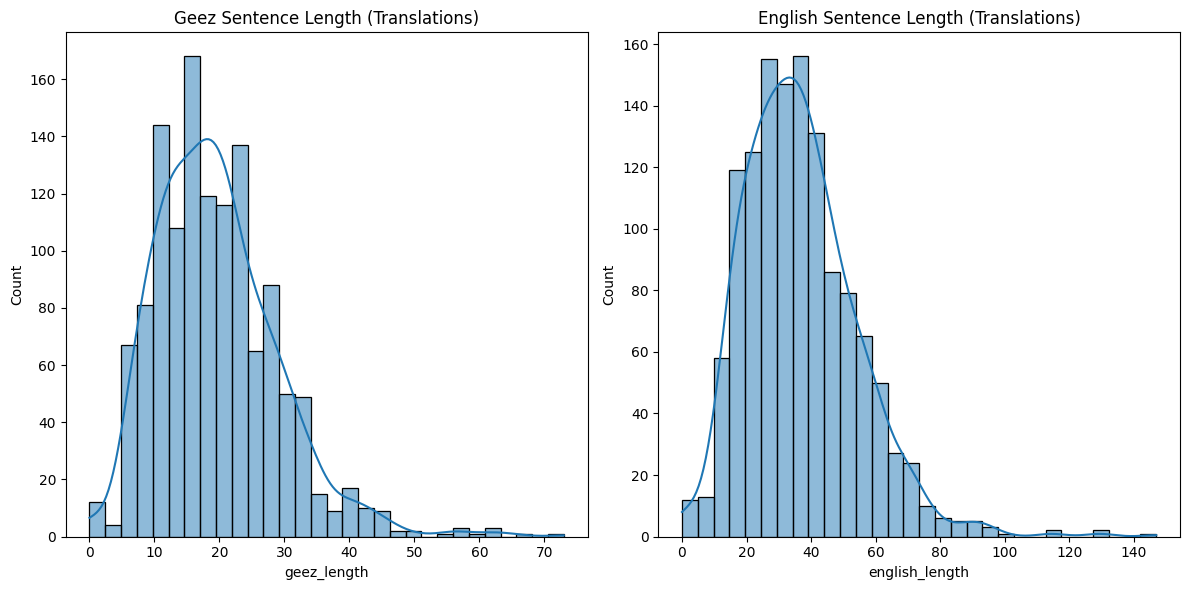

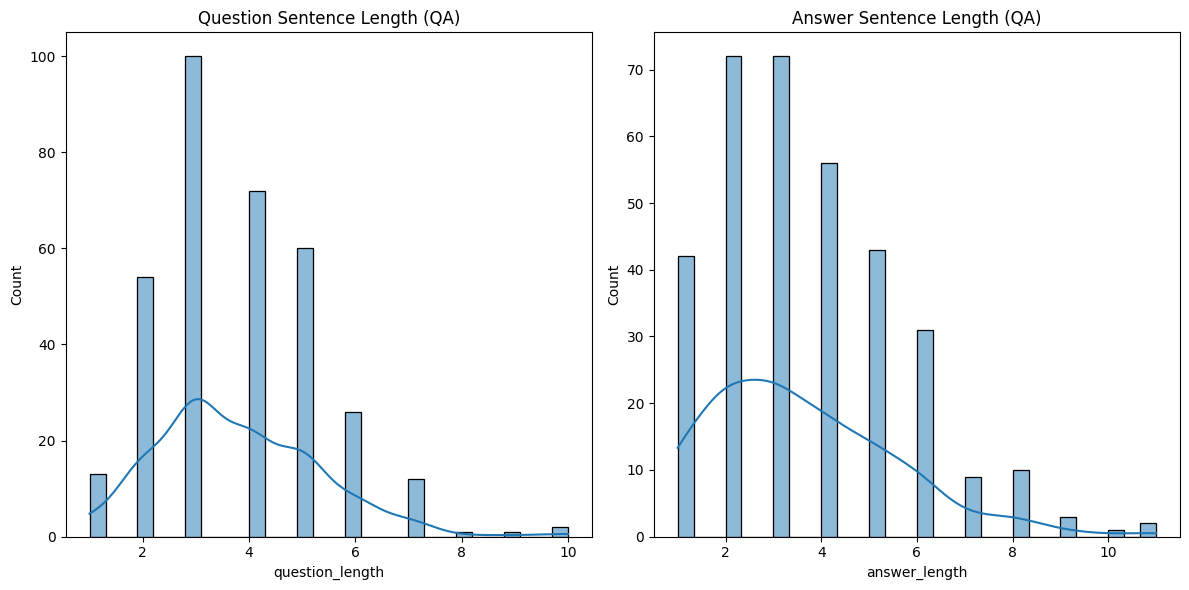

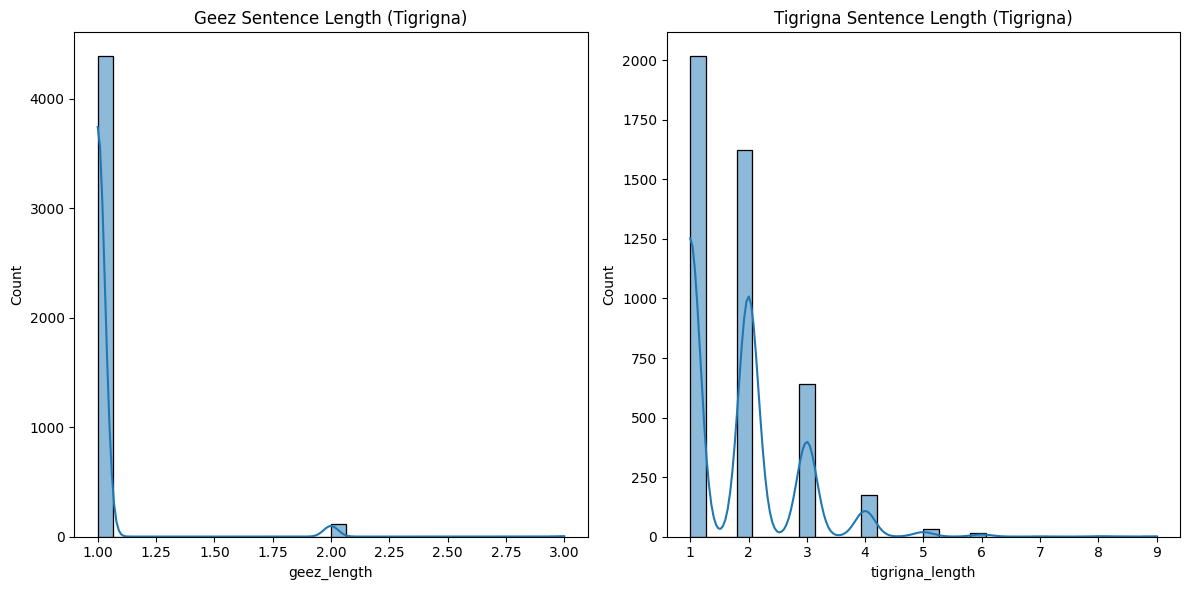

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import pandas as pd
import re

# ===== Load Datasets =====
translation_df = pd.read_csv('/content/processed_translations.csv')
qa_df = pd.read_csv('/content/processed_qa.csv')
geez_tigrigna_df = pd.read_csv('/content/processed_geez_tigrigna.csv')

# ====== Text Cleaning ======
def clean_geez_text(text):
    """Clean Ge'ez script text."""
    if not isinstance(text, str):
        return ''
    text = text.strip()
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Ethiopic numerals
    text = re.sub(r'[^\w\s\u1200-\u137F]', '', text)  # Keep only Ge'ez range and spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# ====== General Tokenizer ======
def tokenize_column(text):
    """Tokenizes cleaned text using NLTK word_tokenize."""
    return word_tokenize(clean_geez_text(text))

# ====== Preprocess Translation Dataset ======
if 'gez' in translation_df.columns and 'eng' in translation_df.columns:
    translation_df['gez_cleaned'] = translation_df['gez'].apply(clean_geez_text)
    translation_df['eng_cleaned'] = translation_df['eng'].apply(clean_geez_text)

    translation_df['gez_tokens'] = translation_df['gez_cleaned'].apply(word_tokenize)
    translation_df['eng_tokens'] = translation_df['eng_cleaned'].apply(word_tokenize)

    translation_df['geez_length'] = translation_df['gez_tokens'].apply(len)
    translation_df['english_length'] = translation_df['eng_tokens'].apply(len)
else:
    print("Translation DataFrame missing 'gez' or 'eng' columns.")

# ====== Preprocess QA Dataset ======
if 'ጥያቄ' in qa_df.columns and 'አውስኦ' in qa_df.columns:
    qa_df['question_cleaned'] = qa_df['ጥያቄ'].apply(clean_geez_text)
    qa_df['answer_cleaned'] = qa_df['አውስኦ'].apply(clean_geez_text)

    qa_df['question_tokens'] = qa_df['question_cleaned'].apply(word_tokenize)
    qa_df['answer_tokens'] = qa_df['answer_cleaned'].apply(word_tokenize)

    qa_df['question_length'] = qa_df['question_tokens'].apply(len)
    qa_df['answer_length'] = qa_df['answer_tokens'].apply(len)
else:
    print("Q&A DataFrame missing 'ጥያቄ' or 'አውስኦ' columns.")

# ====== Preprocess Ge'ez-Tigrigna Dataset ======
if 'ግዕዝ ' in geez_tigrigna_df.columns and 'ትግርኛ ' in geez_tigrigna_df.columns:
    geez_tigrigna_df['geez_tokens'] = geez_tigrigna_df['ግዕዝ '].apply(tokenize_column)
    geez_tigrigna_df['tigrigna_tokens'] = geez_tigrigna_df['ትግርኛ '].apply(tokenize_column)

    geez_tigrigna_df['geez_length'] = geez_tigrigna_df['geez_tokens'].apply(len)
    geez_tigrigna_df['tigrigna_length'] = geez_tigrigna_df['tigrigna_tokens'].apply(len)
else:
    print("Geez-Tigrigna DataFrame missing 'ግዕዝ ' or 'ትግርኛ ' columns.")

# ====== Plot Sentence Length Distributions ======

# --- Translation Data ---
if all(col in translation_df.columns for col in ['geez_length', 'english_length']):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(translation_df['geez_length'], bins=30, kde=True)
    plt.title('Geez Sentence Length (Translations)')

    plt.subplot(1, 2, 2)
    sns.histplot(translation_df['english_length'], bins=30, kde=True)
    plt.title('English Sentence Length (Translations)')
    plt.tight_layout()
    plt.show()
else:
    print("Translation sentence length columns missing.")

# --- Q&A Data ---
if all(col in qa_df.columns for col in ['question_length', 'answer_length']):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(qa_df['question_length'], bins=30, kde=True)
    plt.title('Question Sentence Length (QA)')

    plt.subplot(1, 2, 2)
    sns.histplot(qa_df['answer_length'], bins=30, kde=True)
    plt.title('Answer Sentence Length (QA)')
    plt.tight_layout()
    plt.show()
else:
    print("Q&A sentence length columns missing.")

# --- Ge'ez-Tigrigna Data ---
if all(col in geez_tigrigna_df.columns for col in ['geez_length', 'tigrigna_length']):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(geez_tigrigna_df['geez_length'], bins=30, kde=True)
    plt.title('Geez Sentence Length (Tigrigna)')

    plt.subplot(1, 2, 2)
    sns.histplot(geez_tigrigna_df['tigrigna_length'], bins=30, kde=True)
    plt.title('Tigrigna Sentence Length (Tigrigna)')
    plt.tight_layout()
    plt.show()
else:
    print("Geez-Tigrigna sentence length columns missing.")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load processed data
translation_df = pd.read_csv('/content/processed_translations.csv')
qa_df = pd.read_csv('/content/processed_qa.csv')
geez_tigrigna_df = pd.read_csv('/content/processed_geez_tigrigna.csv')

# Standardize column names and add task labels
translation_df = translation_df[['gez_cleaned', 'eng_cleaned']].rename(columns={
    'gez_cleaned': 'input_text', 'eng_cleaned': 'target_text'
})
translation_df['task'] = 'translate geez to english'

qa_df = qa_df[['question_cleaned', 'answer_cleaned']].rename(columns={
    'question_cleaned': 'input_text', 'answer_cleaned': 'target_text'
})
qa_df['task'] = 'geez qa'

geez_tigrigna_df = geez_tigrigna_df[['geez_cleaned', 'tigrigna_cleaned']].rename(columns={
    'geez_cleaned': 'input_text', 'tigrigna_cleaned': 'target_text'
})
geez_tigrigna_df['task'] = 'translate geez to tigrigna'

# Prefix task to input text
for df in [translation_df, qa_df, geez_tigrigna_df]:
    df['input_text'] = df['task'] + ': ' + df['input_text']

# Combine datasets
combined_df = pd.concat([translation_df, qa_df, geez_tigrigna_df], ignore_index=True)

# Keep task column for stratification, but drop it after split
combined_df_for_split = combined_df[['input_text', 'target_text', 'task']]

# First split: Train (70%) and temp (30%)
train_df, temp_df = train_test_split(
    combined_df_for_split,
    test_size=0.3,
    stratify=combined_df_for_split['task'],
    random_state=42
)

# Second split: Validation (15%) and Test (15%) from temp
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['task'],
    random_state=42
)

# Drop 'task' column before saving
train_df = train_df[['input_text', 'target_text']]
val_df = val_df[['input_text', 'target_text']]
test_df = test_df[['input_text', 'target_text']]

# Save to CSV
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")


Train set: 4288 samples
Validation set: 919 samples
Test set: 920 samples


In [ ]:
from transformers import MT5Tokenizer

tokenizer = MT5Tokenizer.from_pretrained('google/mt5-small')

MAX_LEN = 128

def tokenize_function(example):
    input_encodings = tokenizer(
        example['input_text'], max_length=MAX_LEN, padding='max_length', truncation=True
    )
    target_encodings = tokenizer(
        example['target_text'], max_length=MAX_LEN, padding='max_length', truncation=True
    )
    input_encodings['labels'] = target_encodings['input_ids']
    return input_encodings


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.mt5.tokenization_mt5.MT5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
from torch.utils.data import Dataset
#from datasets import Dataset
import torch

class GeezText2TextDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        model_inputs = tokenize_function(row)
        return {k: torch.tensor(v) for k, v in model_inputs.items()}


In [ ]:
train_dataset = GeezText2TextDataset(train_df)
val_dataset = GeezText2TextDataset(val_df)
test_dataset= GeezText2TextDataset(test_df)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.


PyTorch: 2.6.0+cu124
NumPy: 2.0.2
CUDA available: True
GPU: Tesla T4


<ipython-input-6-01ba216add90>:123: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(



Starting training...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Step,Training Loss,Validation Loss


KeyboardInterrupt: 

## enhanced data training

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:63                                                                             │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:658 in     │
│ from_pretrained                                                                                  │
│                                                                                                  │
│   655 │   │   │   │   raise ValueError(                                                          │
│   656 │   │   │   │   │   f"Tokenizer class {tokenizer_class_candidate} does not exist or is n   │
│   657 │   │   │   │   )                                                                          │
│ ❱ 658 │   │   │   return tokenizer_class.from_pretrained(pretrained_model_name_or_path, *input   │
│   659 │   │                                                                                      │
│   660 │   │   # Otherwise we have to be creative.                                                │
│   661 │   │   # if model is an encoder decoder, the encoder tokenizer class is used by default   │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1804 in          │
│ from_pretrained                                                                                  │
│                                                                                                  │
│   1801 │   │   │   else:                                                                         │
│   1802 │   │   │   │   logger.info(f"loading file {file_path} from cache at {resolved_vocab_fil  │
│   1803 │   │                                                                                     │
│ ❱ 1804 │   │   return cls._from_pretrained(                                                      │
│   1805 │   │   │   resolved_vocab_files,                                                         │
│   1806 │   │   │   pretrained_model_name_or_path,                                                │
│   1807 │   │   │   init_configuration,                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1959 in          │
│ _from_pretrained                                                                                 │
│                                                                                                  │
│   1956 │   │                                                                                     │
│   1957 │   │   # Instantiate tokenizer.                                                          │
│   1958 │   │   try:                                                                              │
│ ❱ 1959 │   │   │   tokenizer = cls(*init_inputs, **init_kwargs)                                  │
│   1960 │   │   except OSError:                                                                   │
│   1961 │   │   │   raise OSError(                                                                │
│   1962 │   │   │   │   "Unable to load vocabulary from file. "                                   │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/transformers/models/t5/tokenization_t5_fast.py:133 in    │
│ __init__                                                                                         │
│                                                                                                  │
│   130 │   │   │   │   │   " tokens"                        

In [ ]:
#import os
#os.kill(os.getpid(), 9)


In [ ]:
import transformers
import peft
print("Transformers:", transformers.__version__)
print("PEFT:", peft.__version__)


Transformers: 4.52.4
PEFT: 0.15.2


In [ ]:
#finall  trainning code
from transformers import MT5ForConditionalGeneration,AutoTokenizer, AutoModelForSeq2SeqLM
, Seq2SeqTrainer, Seq2SeqTrainingArguments
from peft import get_peft_model, LoraConfig, TaskType
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import evaluate
from transformers import DataCollatorForSeq2Seq
import logging
import os

# CUDA checks
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    torch.cuda.empty_cache()
    print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    print(f"GPU memory reserved: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

# Tokenizer & Base Model

tokenizer = AutoTokenizer.from_pretrained("google/mt5-small", legacy=False)
model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")

#tokenizer = MT5Tokenizer.from_pretrained("google/mt5-small", legacy=False)
base_model = MT5ForConditionalGeneration.from_pretrained("google/mt5-small")
base_model.config.use_cache = False
base_model.gradient_checkpointing_enable()

# LoRA Configuration
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q", "k", "v", "o"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM
)

model = get_peft_model(base_model, lora_config)
model.print_trainable_parameters()
model.to("cuda")

# Dataset Class
class GeezDataset(Dataset):
    def __init__(self, tokenizer, texts, targets, max_length=128):
        self.tokenizer = tokenizer
        self.texts = [str(t) if pd.notna(t) else "" for t in texts]
        self.targets = [str(t) if pd.notna(t) else "" for t in targets]
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        input_encoding = self.tokenizer(
            text=self.texts[idx],
            max_length=self.max_length,
            truncation=True,
            padding=False,
            return_tensors="pt"
        )
        target_encoding = self.tokenizer(
            text_target=self.targets[idx],
            max_length=self.max_length,
            truncation=True,
            padding=False,
            return_tensors="pt"
        )
        return {
            "input_ids": input_encoding.input_ids.squeeze(),
            "attention_mask": input_encoding.attention_mask.squeeze(),
            "labels": target_encoding.input_ids.squeeze()
        }

# Data Collator
data_collator = DataCollatorForSeq2Seq(
    tokenizer,
    model=model,
    padding=True,
    label_pad_token_id=-100
)

# Load & Clean CSVs
train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
train_df = train_df.dropna(subset=["input_text", "target_text"])
val_df = val_df.dropna(subset=["input_text", "target_text"])
train_df = train_df[train_df['input_text'].str.strip() != ""]
train_df = train_df[train_df['target_text'].str.strip() != ""]
val_df = val_df[val_df['input_text'].str.strip() != ""]
val_df = val_df[val_df['target_text'].str.strip() != ""]

print(f"Training dataset size: {len(train_df)}")
print(f"Validation dataset size: {len(val_df)}")

# Create Dataset
train_dataset = GeezDataset(tokenizer, train_df['input_text'], train_df['target_text'])
val_dataset = GeezDataset(tokenizer, val_df['input_text'], val_df['target_text'])

# Environment Optimization
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

# Training Args
training_args = Seq2SeqTrainingArguments(
    output_dir='./geez_mt5_lora_model',
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    learning_rate=2e-4,
    predict_with_generate=True,
    generation_max_length=128,
    generation_num_beams=4,
    logging_steps=50,
    save_steps=500,
    eval_steps=500,
    eval_strategy="steps",
    fp16=True,
    gradient_checkpointing=True,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to="none",
    eval_accumulation_steps=4,
    warmup_steps=500
)

# Logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# ROUGE Metric
rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    preds, labels = eval_pred

    if isinstance(preds, torch.Tensor):
        preds = preds.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    vocab_size = tokenizer.vocab_size
    unk_id = tokenizer.unk_token_id or 1
    out_of_range_mask = (preds >= vocab_size) | (preds < 0)
    if np.any(out_of_range_mask):
        logger.warning(f"Found {np.sum(out_of_range_mask)} out-of-range token IDs. Replacing with UNK.")
        preds[out_of_range_mask] = unk_id

    try:
        decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    except Exception as e:
        logger.error(f"Decoding error: {e}")
        return {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0, "rougeLsum": 0.0}

    decoded_preds = [pred.strip() if pred.strip() else "<empty>" for pred in decoded_preds]
    decoded_labels = [label.strip() if label.strip() else "<empty>" for label in decoded_labels]

    if not decoded_preds or not decoded_labels:
        logger.warning("Empty decoded predictions or labels.")
        return {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0, "rougeLsum": 0.0}

    try:
        rouge_output = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

        result = {}
        for key in ["rouge1", "rouge2", "rougeL", "rougeLsum"]:
            result[key] = round(rouge_output.get(key, 0.0) * 100, 4)

        return result

    except Exception as e:
        logger.error(f"Metric computation error: {e}")
        return {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0, "rougeLsum": 0.0}

# Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

print("🚀 Starting LoRA fine-tuning...")
trainer.train()


CUDA available: True
GPU: Tesla T4
GPU memory allocated: 2308.66 MB
GPU memory reserved: 2398.00 MB
trainable params: 688,128 || all params: 300,864,896 || trainable%: 0.2287
Training dataset size: 4277
Validation dataset size: 919


<ipython-input-9-0060f9a26640>:181: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


🚀 Starting LoRA fine-tuning...


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
500,0.000000,nan,0.000000,0.000000,0.000000,0.000000
1000,27.446900,nan,0.000000,0.000000,0.000000,0.000000
1500,0.000000,nan,0.000000,0.000000,0.000000,0.000000


TrainOutput(global_step=1605, training_loss=1.2650266320534584, metrics={'train_runtime': 2040.2918, 'train_samples_per_second': 6.289, 'train_steps_per_second': 0.787, 'total_flos': 495954152859648.0, 'train_loss': 1.2650266320534584, 'epoch': 3.0})